# Importing required packages

In [1]:
import keras.backend as K
import math
import h5py
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input

# import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

# Loading Dataset

In [3]:
def load_dataset():
    train_dataset = h5py.File('train_happy.h5', "r")
    
    # train set features
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) 
    
    # train set labels
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) 

    test_dataset = h5py.File('test_happy.h5', "r")
    
    # test set features
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) 
    
    # test set labels
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) 

    # list of classes
    classes = np.array(test_dataset["list_classes"][:]) 
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [4]:
def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

In [5]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


**Details of the "Happy" dataset**:
- Images are of shape (64,64,3)
- Training: 600 pictures
- Test: 150 pictures


## Building a model in Keras

In [6]:

def HappyModel(input_shape):
     
    X_input = Input(input_shape)

    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((3, 3))(X_input)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7, 7), strides=(1, 1), name='conv0')(X)
    X = BatchNormalization(axis=3, name='bn0')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool')(X)

    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)

    # Create model.
    model = Model(inputs=X_input, outputs=X, name='HappyModel')    
    
    return model

In [7]:
happyModel = HappyModel(X_train.shape[1:])

In [8]:
happyModel.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

# Train the model

In [9]:
happyModel.fit(X_train, Y_train, epochs=100, batch_size=50)

Epoch 1/100
600/600 [==============================] - 15s 24ms/step - loss: 3.1171 - acc: 0.5450
Epoch 2/100
600/600 [==============================] - 13s 21ms/step - loss: 0.6077 - acc: 0.7567
Epoch 3/100
600/600 [==============================] - 14s 23ms/step - loss: 0.2797 - acc: 0.8767
Epoch 4/100
600/600 [==============================] - 15s 26ms/step - loss: 0.2031 - acc: 0.9200
Epoch 5/100
600/600 [==============================] - 15s 26ms/step - loss: 0.1528 - acc: 0.9533
Epoch 6/100
600/600 [==============================] - 13s 21ms/step - loss: 0.1261 - acc: 0.9533
Epoch 7/100
600/600 [==============================] - 14s 24ms/step - loss: 0.1110 - acc: 0.9750
Epoch 8/100
600/600 [==============================] - 17s 28ms/step - loss: 0.1033 - acc: 0.9633
Epoch 9/100
600/600 [==============================] - 17s 29ms/step - loss: 0.1039 - acc: 0.9583
Epoch 10/100
600/600 [==============================] - 18s 29ms/step - loss: 0.0923 - acc: 0.9667
Epoch 11/100
600/60

600/600 [==============================] - 8s 13ms/step - loss: 0.0037 - acc: 0.9983
Epoch 85/100
600/600 [==============================] - 9s 14ms/step - loss: 0.0046 - acc: 1.0000
Epoch 86/100
600/600 [==============================] - 9s 16ms/step - loss: 0.0030 - acc: 1.0000
Epoch 87/100
600/600 [==============================] - 8s 13ms/step - loss: 0.0020 - acc: 1.0000
Epoch 88/100
600/600 [==============================] - 8s 13ms/step - loss: 0.0023 - acc: 1.0000
Epoch 89/100
600/600 [==============================] - 8s 13ms/step - loss: 0.0024 - acc: 1.0000
Epoch 90/100
600/600 [==============================] - 9s 14ms/step - loss: 0.0014 - acc: 1.0000
Epoch 91/100
600/600 [==============================] - 8s 14ms/step - loss: 0.0014 - acc: 1.0000
Epoch 92/100
600/600 [==============================] - 9s 16ms/step - loss: 0.0012 - acc: 1.0000
Epoch 93/100
600/600 [==============================] - 9s 15ms/step - loss: 0.0012 - acc: 1.0000
Epoch 94/100
600/600 [===========

# Checking the accuracy

In [10]:
preds = happyModel.evaluate(X_test, Y_test, batch_size=32, verbose=1, sample_weight=None)
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

150/150 [==============================] - 1s 7ms/step
()
Loss = 0.0791432950894
Test Accuracy = 0.960000003974


# Testing model on my own trial images

Happiness all around


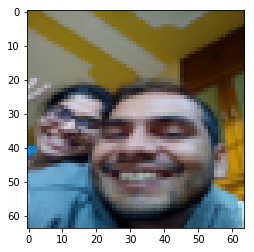

In [11]:
img_path = 'p1.jpg'

img = image.load_img(img_path, target_size=(64, 64))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

y = (happyModel.predict(x))
if(y >= 1):
    print "Happiness all around"
else:
    print "Not Happy"

# Result is [1] means, contents possess happiness :D
* He is infinte source of motivation and happiness :)

# Layer details

In [12]:
happyModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 70, 70, 3)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 64, 64, 32)        4736      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 64, 64, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pool (MaxPooling2D)      (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
__________

# Trying the model on videos

In [13]:
# Necessary imports
import os
from IPython.display import HTML
import io, base64
import cv2

# Getting frames from video

In [14]:
def get_frames(vid):

    cap = cv2.VideoCapture(vid)
    print(cap.isOpened())
    currentFrame = 0
    # Capturing frames till cap.read() returns true
    try:
        if not os.path.exists('data'):
            os.makedirs('data')
    except OSError:
        print ('Error: Creating directory of data')

    # Capturing first frame
    ret, frame = cap.read()
    while(ret):
        # Capture frame-by-frame
        ret, frame = cap.read()

        # Saves image of the current frame in jpg file
        name =  './data/frame' + str(currentFrame) + '.jpg'
        print('Read a new frame: ', ret)
        print ('Creating...' + name)
 
        cv2.imwrite(name, frame)
        #cv2.imshow('window_name', frame) # show frame on window
        # To stop duplicate images
        currentFrame += 1

    # When everything done, release the capture
    cap.release()

# Passing the values from video to model

In [38]:
# Module to detect the videos

def predictVideo(dir):
    happy = 0
    c = 0
    not_happy = 0
    for file in os.listdir(dir):
        if file.endswith(".jpg"):
            img_path = dir + 'frame' + str(c) + '.jpg'
            img = image.load_img(img_path, target_size=(64, 64))
            x = image.img_to_array(img)
            x = np.expand_dims(x, axis=0)
            x = preprocess_input(x)
            y = happyModel.predict(x)
            if(y >= 1):
                happy += 1
            else:
                not_happy += 1
            c += 1
    if((happy < not_happy) or (not_happy > 50)):
        print("Video has non-happy contents")
    else:
        print("Video has happy contents")

# Show the video

In [17]:
vid = "vid1.mp4"
video = io.open(vid, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''
    <video width='480' height='480' controls>
        <source src="data:video/mp4;base64,{0}" type="video/mp4" />
    </video>'''.format(encoded.decode('ascii')))

In [36]:
# Capturing the frames
get_frames(vid)

True
('Read a new frame: ', True)
Creating..../data/frame0.jpg
('Read a new frame: ', True)
Creating..../data/frame1.jpg
('Read a new frame: ', True)
Creating..../data/frame2.jpg
('Read a new frame: ', True)
Creating..../data/frame3.jpg
('Read a new frame: ', True)
Creating..../data/frame4.jpg
('Read a new frame: ', True)
Creating..../data/frame5.jpg
('Read a new frame: ', True)
Creating..../data/frame6.jpg
('Read a new frame: ', True)
Creating..../data/frame7.jpg
('Read a new frame: ', True)
Creating..../data/frame8.jpg
('Read a new frame: ', True)
Creating..../data/frame9.jpg
('Read a new frame: ', True)
Creating..../data/frame10.jpg
('Read a new frame: ', True)
Creating..../data/frame11.jpg
('Read a new frame: ', True)
Creating..../data/frame12.jpg
('Read a new frame: ', True)
Creating..../data/frame13.jpg
('Read a new frame: ', True)
Creating..../data/frame14.jpg
('Read a new frame: ', True)
Creating..../data/frame15.jpg
('Read a new frame: ', True)
Creating..../data/frame16.jpg
('

('Read a new frame: ', True)
Creating..../data/frame143.jpg
('Read a new frame: ', True)
Creating..../data/frame144.jpg
('Read a new frame: ', True)
Creating..../data/frame145.jpg
('Read a new frame: ', True)
Creating..../data/frame146.jpg
('Read a new frame: ', True)
Creating..../data/frame147.jpg
('Read a new frame: ', True)
Creating..../data/frame148.jpg
('Read a new frame: ', True)
Creating..../data/frame149.jpg
('Read a new frame: ', True)
Creating..../data/frame150.jpg
('Read a new frame: ', True)
Creating..../data/frame151.jpg
('Read a new frame: ', True)
Creating..../data/frame152.jpg
('Read a new frame: ', True)
Creating..../data/frame153.jpg
('Read a new frame: ', True)
Creating..../data/frame154.jpg
('Read a new frame: ', True)
Creating..../data/frame155.jpg
('Read a new frame: ', True)
Creating..../data/frame156.jpg
('Read a new frame: ', True)
Creating..../data/frame157.jpg
('Read a new frame: ', True)
Creating..../data/frame158.jpg
('Read a new frame: ', True)
Creating...

In [39]:
# predicting the video
dir = "data/"
predictVideo(dir)

Video has happy contents


# One more example

In [26]:
vid = "vid2.mp4"
video = io.open(vid, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''
    <video width='480' height='480' controls>
        <source src="data:video/mp4;base64,{0}" type="video/mp4" />
    </video>'''.format(encoded.decode('ascii')))

In [29]:
# Capturing the frames
get_frames(vid)

True
('Read a new frame: ', True)
Creating..../data/frame0.jpg
('Read a new frame: ', True)
Creating..../data/frame1.jpg
('Read a new frame: ', True)
Creating..../data/frame2.jpg
('Read a new frame: ', True)
Creating..../data/frame3.jpg
('Read a new frame: ', True)
Creating..../data/frame4.jpg
('Read a new frame: ', True)
Creating..../data/frame5.jpg
('Read a new frame: ', True)
Creating..../data/frame6.jpg
('Read a new frame: ', True)
Creating..../data/frame7.jpg
('Read a new frame: ', True)
Creating..../data/frame8.jpg
('Read a new frame: ', True)
Creating..../data/frame9.jpg
('Read a new frame: ', True)
Creating..../data/frame10.jpg
('Read a new frame: ', True)
Creating..../data/frame11.jpg
('Read a new frame: ', True)
Creating..../data/frame12.jpg
('Read a new frame: ', True)
Creating..../data/frame13.jpg
('Read a new frame: ', True)
Creating..../data/frame14.jpg
('Read a new frame: ', True)
Creating..../data/frame15.jpg
('Read a new frame: ', True)
Creating..../data/frame16.jpg
('

('Read a new frame: ', True)
Creating..../data/frame139.jpg
('Read a new frame: ', True)
Creating..../data/frame140.jpg
('Read a new frame: ', True)
Creating..../data/frame141.jpg
('Read a new frame: ', True)
Creating..../data/frame142.jpg
('Read a new frame: ', True)
Creating..../data/frame143.jpg
('Read a new frame: ', True)
Creating..../data/frame144.jpg
('Read a new frame: ', True)
Creating..../data/frame145.jpg
('Read a new frame: ', True)
Creating..../data/frame146.jpg
('Read a new frame: ', True)
Creating..../data/frame147.jpg
('Read a new frame: ', True)
Creating..../data/frame148.jpg
('Read a new frame: ', True)
Creating..../data/frame149.jpg
('Read a new frame: ', True)
Creating..../data/frame150.jpg
('Read a new frame: ', True)
Creating..../data/frame151.jpg
('Read a new frame: ', True)
Creating..../data/frame152.jpg
('Read a new frame: ', True)
Creating..../data/frame153.jpg
('Read a new frame: ', True)
Creating..../data/frame154.jpg
('Read a new frame: ', True)
Creating...

In [35]:
# predicting the video
dir = "data/"
predictVideo(dir)

Video has non-happy contents


I have used short clips, this model can surely be enhanced to detect happiness inducing contents in much larger videos.